# Librería científica en Python - Pandas

In [10]:
import pandas as pd
print(pd.__version__)

import numpy as np

1.0.5


## Estructrua de datos

Pandas tiene tres estructuras de datos:

- series
- dataframes
- panel (se llamaban así antiguamente)

`Series`es un vector unidimensional, con etiquetas en los ejes y datos homogéneos

In [4]:
# ejemplo con `series`
print(pd.Series([1,1,2,4,5]))

0    1
1    1
2    2
3    4
4    5
dtype: int64


In [5]:
s = pd.Series([1,1,2,4,5])
type(s)

pandas.core.series.Series

In [6]:
# si uno es flotante, el resto se vuelven flotantes
s2 = pd.Series([1,1,2,4,5.])
s2

0    1.0
1    1.0
2    2.0
3    4.0
4    5.0
dtype: float64

In [9]:
# si no le pongo valores lo que me devuelve el sistema son híbridos 
s3 = pd.Series([1,1, "char", 4.,5,True])
s3

0       1
1       1
2    char
3       4
4       5
5    True
dtype: object

In [12]:
# mantiene siempre un índice, podemos manipularlo y asignarle un indice distinto

In [13]:
# el listado es homogeneo, pero qué pasaría si en lugar de corchetes utilizara un diccionario
# así cambiamos el nombre del índice

s4 = pd.Series({
    "alice" : 2,
    "bob" : 3,
    "mario" : 5
})
print(s4)
print(type(s4))

alice    2
bob      3
mario    5
dtype: int64
<class 'pandas.core.series.Series'>


In [14]:
# para extraer el valor de un parámetro (key)
print(s4["alice"])

2


In [16]:
# tambien se puede sacar poniendo el valor de su posicion, comenzando siempre por 0
print(s4[0])

2


In [17]:
# para ver el valor de los indices
s4.keys()

Index(['alice', 'bob', 'mario'], dtype='object')

In [ ]:
# para ver el valor con los valores


In [19]:
# creamos una serie etiquetada a partir de dos vectores e incluimos el nombre del indice
s5 = pd.Series(
    [2, 3, 5],
    index = ["alice", "mario", "bob"])
print(s5)

alice    2
mario    3
bob      5
dtype: int64


## Creamos un dataframe

Un dataframe es una tabla bidimensional con etiquetas en los ejes y datos heterogéneos

In [21]:
df = pd.DataFrame(
    [1, 2, 4],
    [3, 5, 8])
print(df)  # el 0 que aparece es la equiqueta de la columna
# haciendolo así estaría MAL HECHO, es como si hubieramos puesto lo siguiente:
# data =(1,2,4) FALTA ALGOOOO

   0
3  1
5  2
8  4


In [23]:
# en realidad se haría así
df2 = pd.DataFrame([
    [1, 4, 5, 6, 8],
    [6, 0, 1, 8, True],
    ["Hola", 1.2, 1.0]
])
df2

,0,1,2,3,4
0,1,4.0,5.0,6.0,8
1,6,0.0,1.0,8.0,True
2,Hola,1.2,1.0,NaN,None


In [28]:
# Alternativa de configurar las etiquedas del dataframe
df3 = {"alice" : [1980, 1, 1],
      "bob" : [1981, 30, 7],
      "mario" : [1984, 4, 30]}
print(pd.DataFrame(data = df3,
                  index = ["anyo","mes", "dia"]))

      alice   bob  mario
anyo   1980  1981   1984
mes       1    30      4
dia       1     7     30


In [31]:
# Alternativa de configurar las etiquedas con el uso de `listas`
df4 = [[1980, 1, 30],
       [1981, 6, 7],
       [1984, 4, 30]]

print(pd.DataFrame(
    data = df4,
    columns = ["anyo","mes", "dia"],
    index = ["alice", "bob", "mario"]
))

       anyo  mes  dia
alice  1980    1   30
bob    1981    6    7
mario  1984    4   30


In [33]:
# configurar las etiquedas con datos heterogeneos

df5 = [[1980, 1, 30, "Economicas"],
       [1981, 6, 7, "Psicologia"],
       [1984, 4, 30, "Matematicas"]]

print(pd.DataFrame(
    data = df5,
    columns = ["anyo","mes", "dia", "Uni"],
    index = ["alice", "bob", "mario"]
))

       anyo  mes  dia          Uni
alice  1980    1   30   Economicas
bob    1981    6    7   Psicologia
mario  1984    4   30  Matematicas


In [34]:
# ejemplo que pone Marco en Slack para ver si nos funciona a cada uno. 
# es una agrupacion de los colores 

img = [[[0, 0, 0], [0, 15, 0], [0, 0, 15], [15, 0, 0], [180, 180, 180]],
       [[200, 200, 200], [125, 1, 125], [100, 100, 2], [1, 152, 125], [15, 25, 20]]]
# Utilizamos números para indexar filas y columnas, y las letras
# "R", "G", "B" para indicar el contenido de este color en cada píxel
index = pd.MultiIndex.from_product(
    [range(len(img)), range(len(img[0])), ["R", "G", "B"]], 
    names=['row', 'column', 'color'])
# Creamos la serie con el índice multidimensional especificando los datos
# y los índices
s = pd.Series([x for row in img for col in row for x in col], 
               index=index)
s

row  column  color
0    0       R          0
             G          0
             B          0
     1       R          0
             G         15
             B          0
     2       R          0
             G          0
             B         15
     3       R         15
             G          0
             B          0
     4       R        180
             G        180
             B        180
1    0       R        200
             G        200
             B        200
     1       R        125
             G          1
             B        125
     2       R        100
             G        100
             B          2
     3       R          1
             G        152
             B        125
     4       R         15
             G         25
             B         20
dtype: int64

## Visualización gráfica con pandas. Imagen de 2 filas y 5 columnas

Populating the interactive namespace from numpy and matplotlib


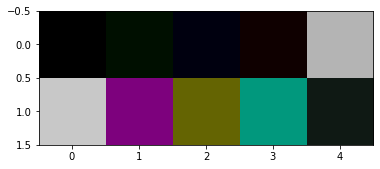

In [35]:
# vamos a pintar, sale la gama de colores
%pylab inline
from pylab import imshow
imshow(array(img, dtype = uint16), interpolation = "nearest")

## Tratar datos en Pandas

In [37]:
# CÓMO CARGAR UN ARCHIVO (UN DATASET ) desde un enlace
data = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv")

data

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [38]:
# mostramos las 5 primeras filas
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [39]:
# mostramos las n primeras filas 
data.head(10)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
5,2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0
6,2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0
7,1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0
8,29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0
9,1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,Nov-61,1961.0


In [41]:
# mostramos las ultimas filas
data.tail(10)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
16366,643435,Karen (Hijack's girlfriend) (Earth-616),\/Karen_(Hijack%27s_girlfriend)_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Black Hair,Female Characters,NaN,Living Characters,NaN,NaN,NaN
16367,694583,Marcus (Kate Bishop's neighbor) (Earth-616),\/Marcus_(Kate_Bishop%27s_neighbor)_(Earth-616),Public Identity,Good Characters,Hazel Eyes,Bald,Male Characters,Homosexual Characters,Living Characters,NaN,NaN,NaN
16368,703892,Marcy (Offer's employee) (Earth-616),\/Marcy_(Offer%27s_employee)_(Earth-616),Public Identity,Neutral Characters,NaN,Brown Hair,Female Characters,NaN,Living Characters,NaN,NaN,NaN
16369,660799,Melanie Kapoor (Earth-616),\/Melanie_Kapoor_(Earth-616),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,NaN,Living Characters,NaN,NaN,NaN
16370,674414,Phoenix's Shadow (Earth-616),\/Phoenix%27s_Shadow_(Earth-616),NaN,Neutral Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16375,673702,Yologarch (Earth-616),\/Yologarch_(Earth-616),NaN,Bad Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN


In [42]:
# si quiero ver el tipo de dato, es un data frame
type(data)

pandas.core.frame.DataFrame

In [43]:
# si quiero mostrar las etiquetas
data.index

RangeIndex(start=0, stop=16376, step=1)

In [45]:
# mostrar las estadisticas basicas, pandas solo mostrará las de los valores numericos

data.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


In [ ]:
# indexacion en slice 
# pasa la ultima parte de la clase 